<a href="https://colab.research.google.com/github/skroy57099-ux/Python-airline-flight-data-Project/blob/main/Airlines_Flights_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airlines Flight Data **Analysis**

In [3]:
# import the required python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the flight datasets

flights = pd.read_csv('/content/airlines_flights_data.csv')
flights

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
# Cleaning of datasets:

flights.drop(columns =  'index', inplace = True)        #remove the index columns(repeated ones), (inplace=True) will remove permanently
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#Get some info about the dataset

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
#Get  statistical  summary about the dataset

flights.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
flights[flights['duration'] == 49.830000]    # Details airlines with max flight duration
flights[flights['price'] == 7425.000000]     # Details airlines with 50% amounts
flights[flights['duration'] == 0.830000]     # Details airlines with min flight duration
flights[flights['price'] == 123071.000000]   # Details airlines with max price
flights[flights['price'] == 1105.000000 ]    # Details airlines with min price

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [9]:
flights.isnull().sum()         #Check for missing values
flights.duplicated().sum()     #Check for duplicate values

np.int64(0)

<Axes: ylabel='count'>

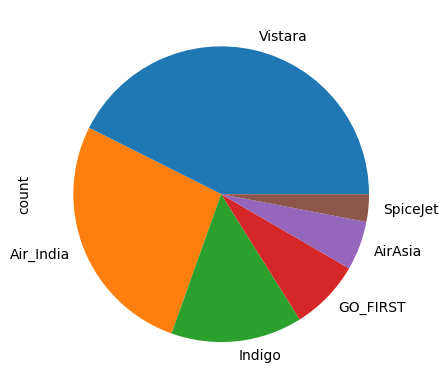

In [10]:
#Q.1. What are the airlines in the dataset, accompanied by their frequencies?
flights['airline'].unique()
flights['airline'].value_counts()
flights['airline'].value_counts().plot(kind = 'pie',color = ['r','g','y','b','black','pink'])

<Axes: xlabel='departure_time'>

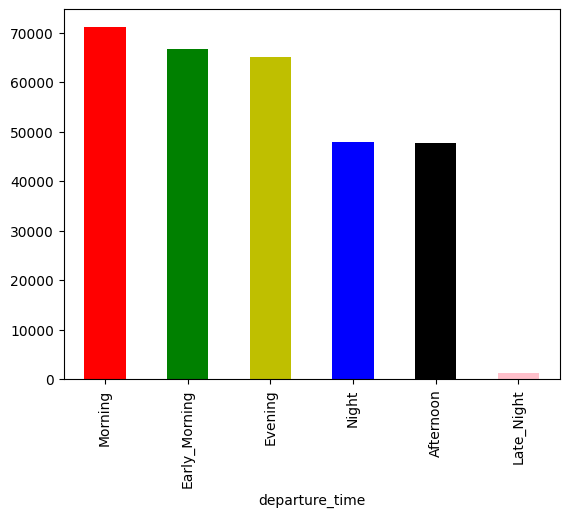

In [11]:
# Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.
flights['departure_time'].value_counts().plot(kind = 'bar',color = ['r','g','y','b','black','pink'])   #Departure timing

<Axes: xlabel='arrival_time'>

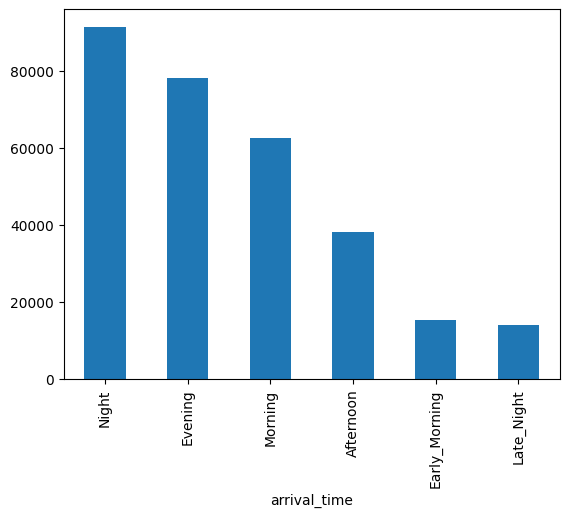

In [12]:
flights['arrival_time'].value_counts().plot(kind='bar')  #Arrival timing

In [13]:
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: xlabel='source_city'>

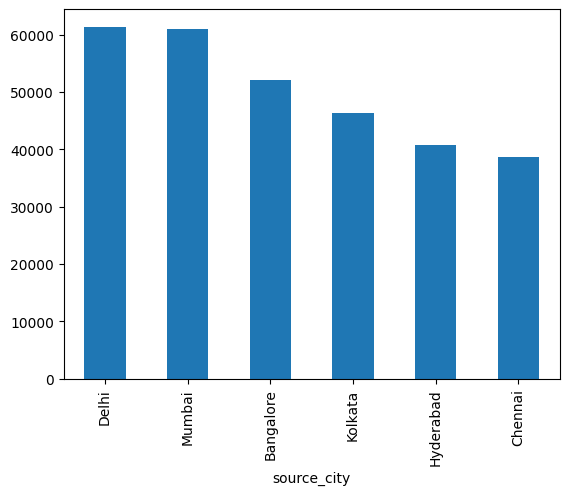

In [14]:
#Q.3. Show Bar Graphs representing the Source City & Destination City.
flights['source_city'].value_counts().plot(kind= 'bar')       #Source city

<Axes: xlabel='destination_city'>

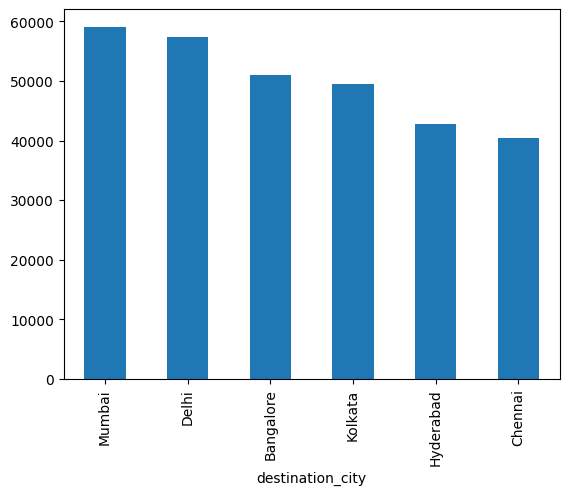

In [15]:
flights['destination_city'].value_counts().plot(kind= 'bar')          #Destination city

In [16]:
#Q.4. Does price varies with airlines ?
flights.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


<Axes: xlabel='airline'>

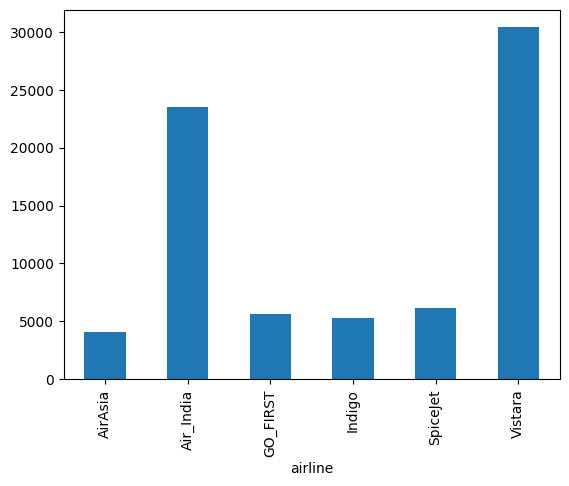

In [17]:
flights.groupby('airline')['price'].mean().plot(kind = 'bar')

<Axes: xlabel='departure_time'>

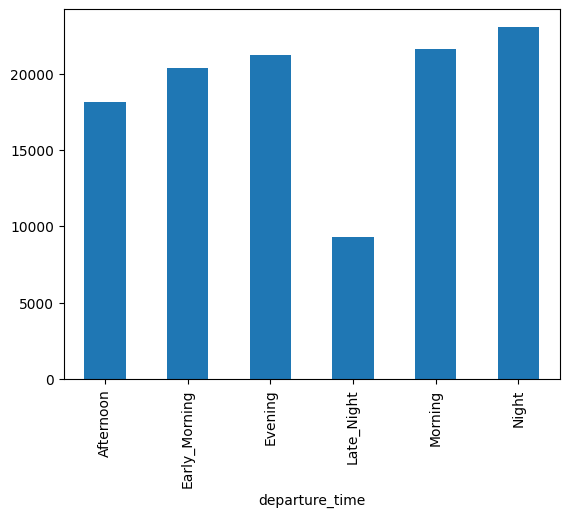

In [18]:
# Q.5. Does ticket price change based on the departure time and arrival time?
flights.groupby('departure_time')['price'].mean().plot(kind = 'bar')    #price change based on the departure time

<Axes: xlabel='arrival_time'>

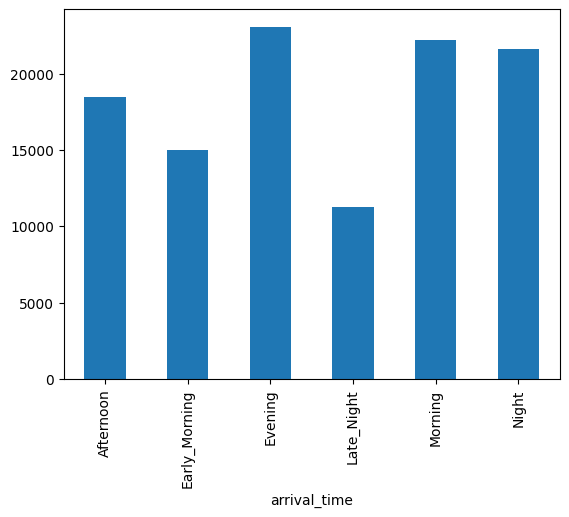

In [19]:
flights.groupby('arrival_time')['price'].mean().plot(kind = 'bar')    #price change based on the arrival time

In [20]:
avg_price = flights.groupby(['departure_time','arrival_time'])['price'].mean().reset_index()
avg_price

,departure_time,arrival_time,price
0,Afternoon,Afternoon,14741.746011
1,Afternoon,Early_Morning,21159.511401
2,Afternoon,Evening,15548.836651
3,Afternoon,Late_Night,10811.615662
4,Afternoon,Morning,26056.580994
5,Afternoon,Night,19097.798757
6,Early_Morning,Afternoon,16564.731082
7,Early_Morning,Early_Morning,9540.191523
8,Early_Morning,Evening,24804.077441
9,Early_Morning,Late_Night,29638.037500


In [22]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=avg_price)

https://docs.google.com/spreadsheets/d/1Srs-BUuwxU0yObl8_KFygdHCM7LTLjLewXv4Cir-Dr8/edit#gid=0


In [23]:
#Q.6. How the price changes with change in Source and Destination?
flights.groupby(['source_city','destination_city'])['price'].mean()

source_city  destination_city
Bangalore    Chennai             23321.850078
             Delhi               17723.313972
             Hyderabad           21226.121192
             Kolkata             23500.061229
             Mumbai              23128.618672
Chennai      Bangalore           25081.850454
             Delhi               18981.863948
             Hyderabad           21591.345404
             Kolkata             22669.932407
             Mumbai              22765.849647
Delhi        Bangalore           17880.216315
             Chennai             19369.881354
             Hyderabad           17347.288379
             Kolkata             20566.409418
             Mumbai              19355.829812
Hyderabad    Bangalore           21347.177998
             Chennai             21848.065989
             Delhi               17243.945685
             Kolkata             20823.893201
             Mumbai              20080.865759
Kolkata      Bangalore           22744.808428
             Chennai             23660.361040
             Delhi               19422.354559
             Hyderabad           21500.011397
             Mumbai              22078.883579
Mumbai       Bangalore           23147.873807
             Chennai             22781.899112
             Delhi               18725.320008
             Hyderabad           21004.046705
             Kolkata             22379.146723
Name: price, dtype: float64

In [24]:
avgs_price = flights.groupby(['source_city','destination_city'])['price'].mean().reset_index()
avgs_price

,source_city,destination_city,price
0,Bangalore,Chennai,23321.850078
1,Bangalore,Delhi,17723.313972
2,Bangalore,Hyderabad,21226.121192
3,Bangalore,Kolkata,23500.061229
4,Bangalore,Mumbai,23128.618672
5,Chennai,Bangalore,25081.850454
6,Chennai,Delhi,18981.863948
7,Chennai,Hyderabad,21591.345404
8,Chennai,Kolkata,22669.932407
9,Chennai,Mumbai,22765.849647


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=avgs_price)

https://docs.google.com/spreadsheets/d/1KEvZUaAA7gx2tdjxXySBL_vk6JmfKQEElBh5BfIn20Q/edit#gid=0


In [26]:
#Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

flights.groupby(['days_left','departure_time'])['price'].mean()
price_change = flights.groupby(['days_left','departure_time'])['price'].mean().reset_index()
price_change

,days_left,departure_time,price
0,1,Afternoon,14314.309659
1,1,Early_Morning,14502.246575
2,1,Evening,27921.819876
3,1,Late_Night,6270.000000
4,1,Morning,14866.654589
...,...,...,...
286,49,Early_Morning,18459.767575
287,49,Evening,19604.492958
288,49,Late_Night,3549.466667
289,49,Morning,20013.065401


In [28]:
#Q.8. How does the ticket price vary between Economy and Business class?
flights.groupby('class')['price'].sum()


,price
class,
Business,4911814564
Economy,1358279711


In [27]:
#Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?
flights_filtered = flights[(flights['airline'] == 'Vistara') & (flights['source_city'] == 'Delhi') & (flights['destination_city'] == 'Hyderabad') & (flights['class'] == 'Business')]
average_price = flights_filtered['price'].mean()
print(average_price)

47939.840361445786
